In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
sns.set(style="ticks")

In [9]:
#1

Transactions = pd.read_csv('Transactions.csv')
Customer = pd.read_csv('Customer.csv')
Prod_Info = pd.read_csv('prod_cat_info.csv')

In [26]:
Prod_Info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [27]:
Prod_Info

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [11]:
Transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [12]:
Customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [3]:
table1 = pd.merge(left=Transactions,right=Customer,left_on='cust_id',right_on='customer_Id',how='inner')
table2 = pd.merge(left=table1,right=Prod_Info,left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'],how='inner')

In [6]:
table1

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0
2,36957441426,270351,16-09-2013,3,2,3,361,113.715,1196.715,Flagship store,270351,26-09-1981,M,5.0
3,12236277258,270351,18-03-2013,8,3,3,1030,324.450,3414.450,e-Shop,270351,26-09-1981,M,5.0
4,13181563739,270351,13-12-2011,6,5,1,1048,110.040,1158.040,e-Shop,270351,26-09-1981,M,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,16293185603,274931,31-01-2011,8,3,3,137,43.155,454.155,Flagship store,274931,10-06-1972,M,10.0
23049,70163958026,267902,30-01-2011,10,5,4,404,169.680,1785.680,e-Shop,267902,17-07-1975,M,4.0
23050,20417144530,269556,29-01-2011,10,6,3,654,206.010,2168.010,Flagship store,269556,27-12-1972,M,5.0
23051,58531412371,274935,29-01-2011,10,5,4,104,43.680,459.680,Flagship store,274935,09-09-1977,F,3.0


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [7]:
table2

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women


# 2. Prepare a summary report for the merged data set.

# a. Get the column names and their corresponding data types

In [7]:
table2.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code_x        int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat_code_y        int64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

# b. Top/Bottom 10 observations

In [11]:
table2.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,1,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,1,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,1,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,1,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,1,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,1,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,1,Women


In [9]:
table2.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,4,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,4,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,4,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,4,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,4,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,4,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,4,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,4,Women


# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [8]:
table2.describe().loc['min':'max']

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code,prod_sub_cat_code
min,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,266783.0,1.0,1.0
25%,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,268935.0,3.0,3.0
50%,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,270980.0,5.0,5.0
75%,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,273114.0,8.0,10.0
max,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,275265.0,10.0,12.0


# d. Frequency tables for all the categorical variables

In [12]:
ab = table2[['Store_type','Gender','prod_cat','prod_subcat']]

print(ab['Store_type'].value_counts(), end='\n\n')
print(ab['Gender'].value_counts(), end='\n\n')
print(ab[['prod_cat','prod_subcat']].value_counts(), end='\n\n')


e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

M    11811
F    11233
Name: Gender, dtype: int64

prod_cat          prod_subcat        
Home and kitchen  Tools                  1062
Footwear          Women                  1048
Books             Fiction                1043
Home and kitchen  Kitchen                1037
Books             Children               1035
Electronics       Mobiles                1031
Books             Comics                 1031
Home and kitchen  Bath                   1023
Footwear          Kids                   1009
Home and kitchen  Furnishing             1007
Clothing          Women                  1005
Books             Non-Fiction            1004
Bags              Mens                   1003
                  Women                   995
Books             DIY                     989
Clothing          Kids                    988
Electronics       Cameras                 985
      

# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

# Continuous Variables

<Axes: ylabel='Frequency'>

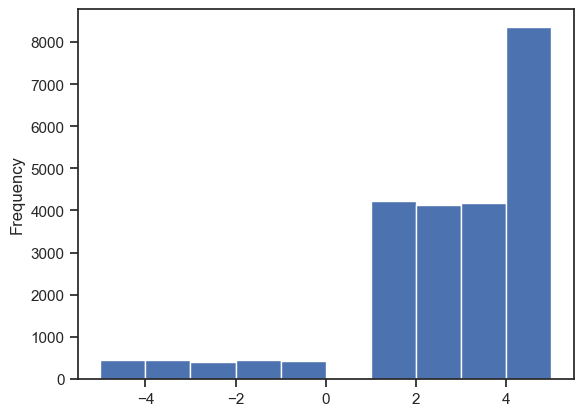

In [23]:
Quantity = table2['Qty']
Quantity.plot(kind='hist',x='Qty')

<Axes: ylabel='Frequency'>

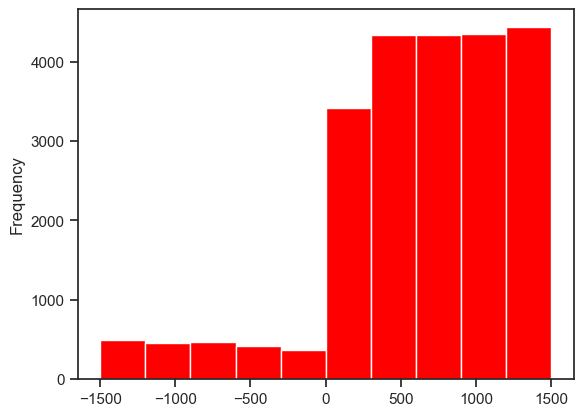

In [25]:
rate = table2['Rate']
rate.plot(kind='hist',x='Rate',color='red')

<Axes: ylabel='Frequency'>

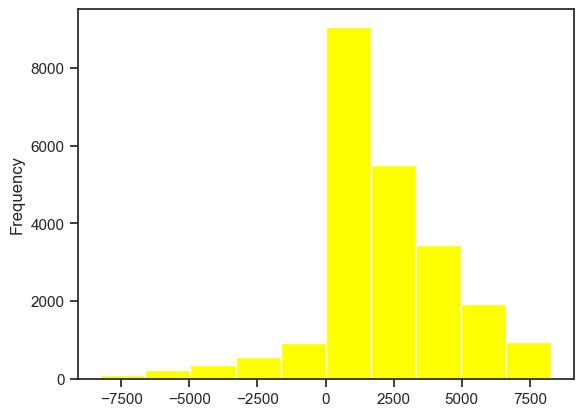

In [27]:
Amount = table2['total_amt']
Amount.plot(kind='hist',x='total_amt',color='yellow')

# Categorical Variables

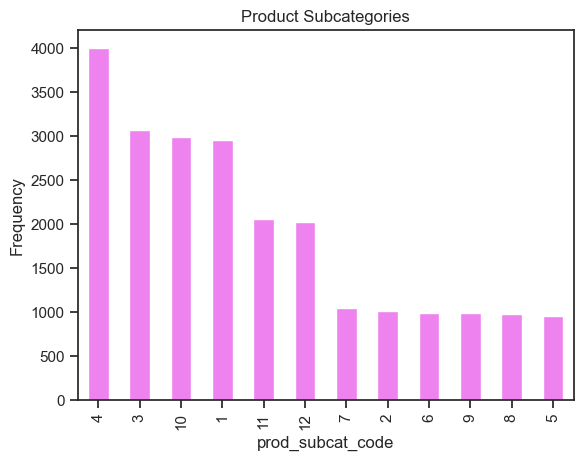

In [16]:
Prod_SubCat = table2['prod_subcat_code'].value_counts()
Prod_SubCat.plot(kind='bar',color='violet')
plt.xlabel('prod_subcat_code')
plt.ylabel('Frequency')
plt.title('Product Subcategories')
plt.show()

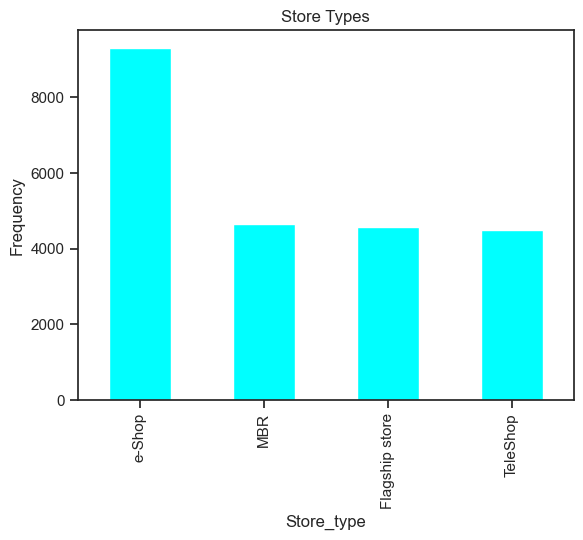

In [15]:
Prod_SubCat = table2['Store_type'].value_counts()
Prod_SubCat.plot(kind='bar',color='cyan')
plt.xlabel('Store_type')
plt.ylabel('Frequency')
plt.title('Store Types')
plt.show()

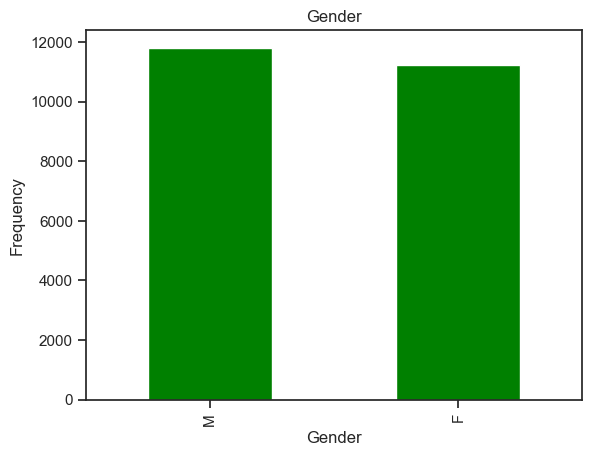

In [24]:
Prod_SubCat = table2['Gender'].value_counts()
Prod_SubCat.plot(kind='bar',color='Green')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender')
plt.show()

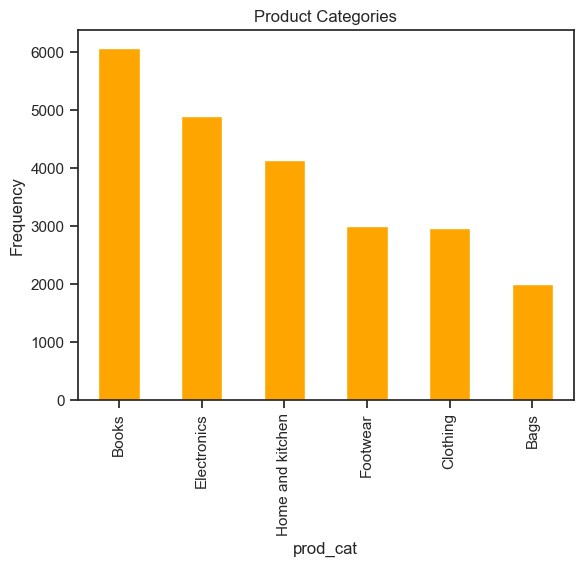

In [20]:
Prod_SubCat = table2['prod_cat'].value_counts()
Prod_SubCat.plot(kind='bar',color='orange')
plt.xlabel('prod_cat')
plt.ylabel('Frequency')
plt.title('Product Categories')
plt.show()

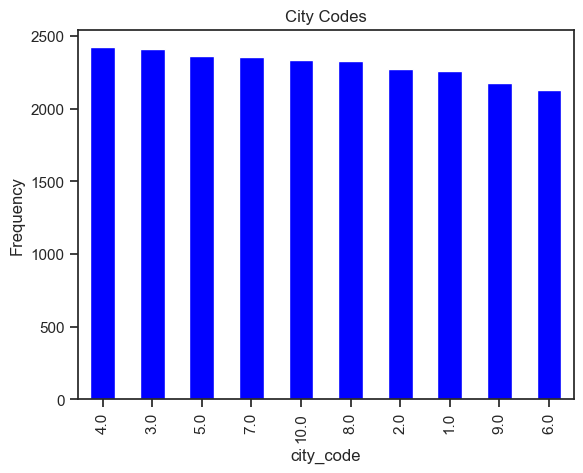

In [23]:
Prod_SubCat = table2['city_code'].value_counts()
Prod_SubCat.plot(kind='bar',color='blue')
plt.xlabel('city_code')
plt.ylabel('Frequency')
plt.title('City Codes')
plt.show()

# 4. Calculate the following information using the merged dataset :

# a. Time period of the available transaction data

In [14]:
table2.tran_date = pd.to_datetime(table2.tran_date,infer_datetime_format=True)#pd.to_datetime(table2.tran_date)

In [15]:
DT = max(table2.tran_date) - min(table2.tran_date)
print("The Range is:",DT.days)

The Range is: 1430


# b. Count of transactions where the total amount of transaction was negative

In [18]:
CoT = len(table2[table2.total_amt<0])
CoT

2177

# 5. Analyze which product categories are more popular among females vs male customers

In [19]:
pd.pivot_table(data=table2,index='prod_cat',columns='Gender',values='transaction_id',aggfunc='count')

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [23]:
maxc = pd.pivot_table(data=table2,index='city_code',values='customer_Id',aggfunc='count')
cus = maxc.sort_values(by='customer_Id',ascending=False).iloc[:1]

In [24]:
cus

,customer_Id
city_code,
4.0,2422


In [30]:
cus3 = cus.iloc[0,0]

cus1 = round((cus3/len(table2))*100,2)

cus2 = cus.index[0]

print(f'The percentage in the city {cus2} has the highest number of customers :',cus1)

The percentage in the city 4.0 has the highest number of customers : 10.51


# 7. Which store type sells the maximum products by value and by quantity?

In [31]:
maxp = pd.pivot_table(data=table2,index='Store_type',values=['Qty','total_amt'],aggfunc='max')
pro = maxp.sort_values(by=['Qty','total_amt'],ascending=False).iloc[:1]
pro

,Qty,total_amt
Store_type,,
MBR,5,8287.5


In [32]:
pro1 = pro.index[0]

pro2 = pro.iloc[0,1]

print(f'The Store {pro1} has the product with maximum value and Quantity is :',pro2)

The Store MBR has the product with maximum value and Quantity is : 8287.5


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [33]:
procat = table2[(table2.Store_type=='Flagship store')&(table2.prod_cat.isin(["Electronics","Clothing"]))]
value = procat['total_amt'].sum()
print(f'The total amount earned from Clothing and Electronics in Flagship store is :',value)

The total amount earned from Clothing and Electronics in Flagship store is : 3409559.27


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [34]:
procat1 = table2[(table2.Gender=='M')&(table2.prod_cat=='Electronics')]
value1 = procat1['total_amt'].sum()
print(f'The total amount earned by Males from Electronics is :',value1)

The total amount earned by Males from Electronics is : 5703109.425000001


# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [36]:
tran1 = table2[table2.total_amt>0].groupby('customer_Id').agg({'transaction_id':'count'})
tran1[tran1.transaction_id>10]

,transaction_id
customer_Id,
266794,11
270535,11
270803,11
272741,11
273014,11
274227,11


# 11. For all customers aged between 25 - 35, find out:

In [37]:
table2.DOB = pd.to_datetime(table2.DOB)

In [47]:
table2['Age'] = (dt.datetime.now()-table2.DOB).dt.days

In [49]:
age = table2[table2.Age.between(25,35)]

# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [55]:
procat1 = table2[(table2.prod_cat=='Books')|(table2.prod_cat=='Electronics')]['total_amt'].sum()
procat1

23545157.675

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [56]:
procat2 = table2[(table2.tran_date>'01-01-2014')|(table2.tran_date<'01-03-2014')]['total_amt'].sum()
procat2

48579771.37